5. Usando as bibliotecas Pandas e MatPlotLib e um dataset (podes selecionar das aulas, fazer download na plataforma kaggle ou escolher um dataset pessoal), elabora um notebook jupyter no qual efetues: 
Limpeza e tratamento de dados; 
Processamento de dados: groupby, filter, criação de novas colunas,…; 
Visualização de dados;

Considerações:
Primeiro fazer a importação das bibliotecas e carregar o dataset e exibição das primeiras e ultimas linhas do ficheiro
Seguidamente Limpeza e tratamento dos dados
Posteriormente Processar os dados


In [60]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Carregamento do dataset e visualização das primeiras e últimas linhas

df = pd.read_csv('titanic.csv')

print(df.head())
print(df.tail())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

verificar o tipo de dados

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Limpeza e tratamento dos dados
Verificar valores nulos, embora no comando anterior já se via que não existem
Verificar se existem outliers

In [62]:
print(df.isnull().any())


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


Criar um novo dataframe (df2) sem a coluna cabin que contém valor nulos

In [63]:
df2 = df.drop('Cabin',axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Como  existem valores nulos na coluna 'Age'
Substituir valores nulos na idade, pela média de idades, com este comando 
ver média e mediana da idade

In [64]:

df2['Age'].fillna(df2['Age'].mean(), inplace=True)
media_idade = df2['Age'].mean()
mediana_idade = df2['Age'].median()

print(media_idade)
print(mediana_idade)


29.839173669467783
29.839173669467783


C:\Users\vpereira.COFINA\AppData\Local\Temp\ipykernel_17848\1686747710.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(df2['Age'].mean(), inplace=True)


In [65]:
print(df2.groupby('Embarked')["PassengerId"].count())

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64


preencher as linhas na coluna  'Embarked' com valores nunlos com  o comando:

In [66]:
df2['Embarked'].fillna('S', inplace=True)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


C:\Users\vpereira.COFINA\AppData\Local\Temp\ipykernel_17848\2744170021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Embarked'].fillna('S', inplace=True)



Verificar se ainda existem  valores nulos, com o comando seguinte:

In [67]:

print(df2.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Criar um ficheiro sem dados nulos

In [68]:
df2.to_csv('titanic_no_nulls.csv', index=False)

Processamento dos dados:
Criar uma nova coluna 'FamilySize' (SibSp + Parch + 1)
Filtrar passageiros com mais de 3 familiares
Agrupar por 'Pclass' e calcular a média de sobrevivência
Exibir a média de sobrevivência por classe


In [69]:
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df_familia_grande = df2[df2['FamilySize'] > 3]
sobrevivencia_por_classe = df2.groupby('Pclass')['Survived'].mean()
print(sobrevivencia_por_classe)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Verificação e eliminação de outliers, se existirem
ler o ficheiro sem valores nulos

In [73]:
df3 = pd.read_csv('titanic_no_nulls.csv')

primeiro passo para identificar outliers é ver uma breve descrição dos dados numéricos

In [74]:
print(df3.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.839174    0.523008   
std     257.353842    0.486592    0.836071   13.454159    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.839174    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000  133.000000    8.000000   

            Parch         Fare  
count  891.000000   891.000000  
mean     0.381594    37.234698  
std      0.806057   173.359298  
min      0.000000   -10.100000  
25%      0.000000     7.910400  
50%      0.000000    14.454200  
75%      0.000000    31.000000  
max      6.000000  5012.329200  


As colunas a analisar são: "Age", 'SibSp', 'Parch' e 'Fare'
a menor tarifa é negativa(provavelmente um erro)
a maior tarifa é um número 10x maior que o terceiro quartil (75%)
há algém com a idade de 133 anos, hoje pouco provável. deve tratar-se de um outlier ou erro

vamos tratar aqui as anomalias como erros nos dados e vamos remove-los trocando pelo valor médio

In [75]:
#Análise da idade, primeiros e ultimos 5 valores
print(df3.sort_values('Age', ascending=False).head(5)['Age'])
print(df3.sort_values('Age', ascending=True).head(5)['Age'])

103    133.0
630     80.0
851     74.0
493     71.0
96      71.0
Name: Age, dtype: float64
803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
Name: Age, dtype: float64


In [76]:
#como a idade de 133 parece um outlier, troca-se pela média de idades
media_idade = df3['Age'].mean()
df3.loc[df3['Age']==133, 'Age'] = media_idade

In [77]:
#Análise da tarifa, primeiros e últimos 5 valores
print(df3.sort_values('Fare', ascending=False).head(5)['Fare'])
print(df3.sort_values('Fare', ascending=True).head(5)['Fare'])

258    5012.3292
737     512.3292
679     512.3292
88      263.0000
438     263.0000
Name: Fare, dtype: float64
156   -10.1
815     0.0
413     0.0
806     0.0
302     0.0
Name: Fare, dtype: float64


Constata-se um valor negativo e um valor 10x superior ao segundo mais caro
vamos tratá-los como erros e atualizá-los com o valor da mediana da tarifa
usando a mediana em vez da média, que é menos sensível aos outlires

In [79]:
mediana_tarifa = df3['Fare'].median()
df3.loc[df3['Fare']>5000, 'Fare']=mediana_tarifa
df3.loc[df3['Fare']<0, 'Fare']=mediana_tarifa

print(df3.sort_values('Fare',ascending=False).head(5)['Fare'])
print(df3.sort_values('Fare',ascending=True).head(5)['Fare'])

737    512.3292
679    512.3292
27     263.0000
438    263.0000
341    263.0000
Name: Fare, dtype: float64
822    0.0
806    0.0
815    0.0
413    0.0
466    0.0
Name: Fare, dtype: float64


Dados estão tratados, guarda-se um novo ficheiro 

In [80]:
df3.to_csv('titanic_no_nulls_no_outliers.csv', index=False)

Apresentação gráfica dos dados sobre:
Sobrevivencia por classe - Gráfico de barras
Idade vs Tarifa vs sobrevivência - Gráfico de dispersão 
Distribuição das idades - Historigrama

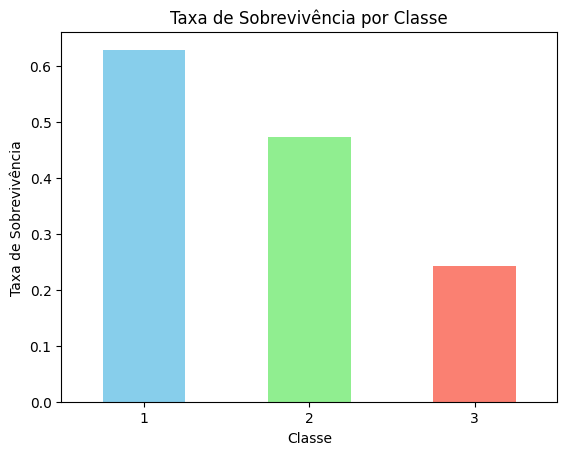

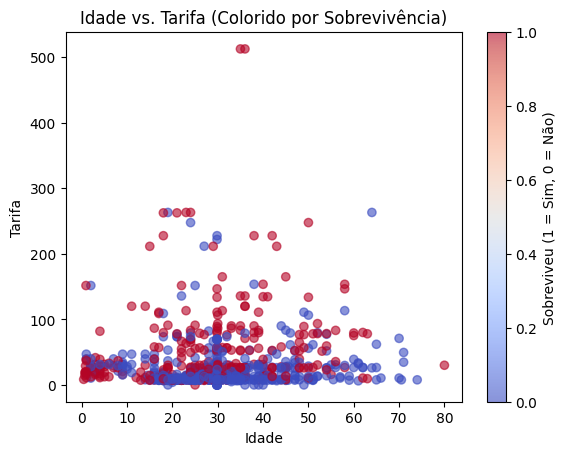

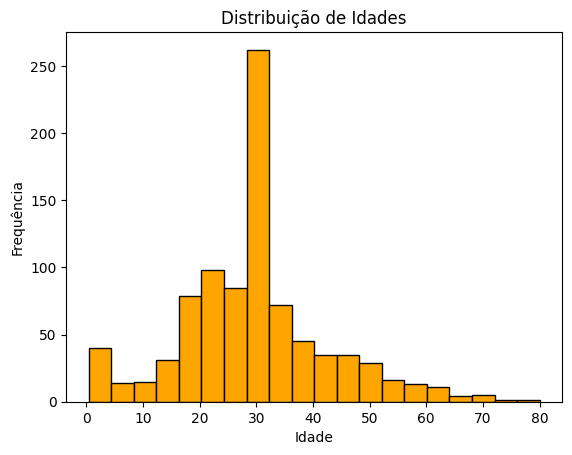

In [83]:
# Gráfico de barras: Sobrevivência por classe
sobrevivencia_por_classe.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.xticks(rotation=0)
plt.show()

# Gráfico de dispersão: Idade vs Tarifa, colorido por sobrevivência
plt.scatter(df3['Age'], df3['Fare'], c=df3['Survived'], cmap='coolwarm', alpha=0.6)
plt.title('Idade vs. Tarifa (Colorido por Sobrevivência)')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.colorbar(label='Sobreviveu (1 = Sim, 0 = Não)')
plt.show()

# Histograma: Distribuição de idades
plt.hist(df3['Age'], bins=20, color='orange', edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()